In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("loan-train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## EDA

<Axes: >

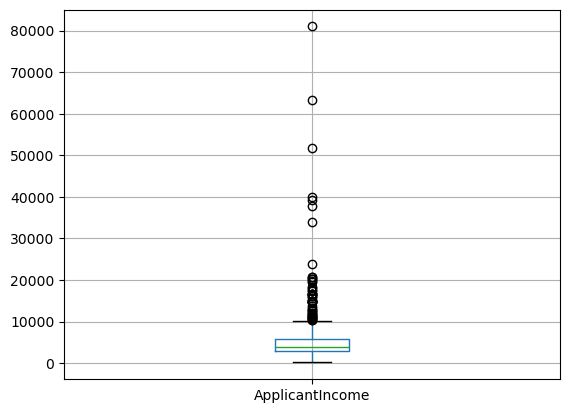

In [6]:
df.boxplot(column='ApplicantIncome')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

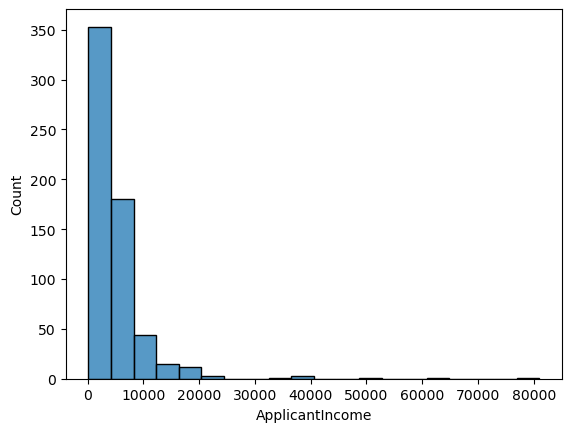

In [7]:
sns.histplot(df['ApplicantIncome'], bins=20)

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

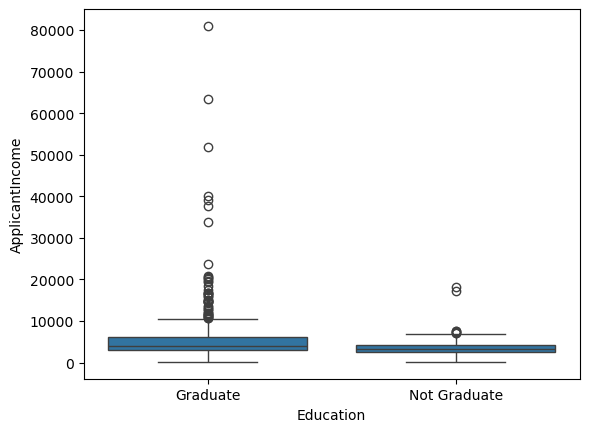

In [8]:
sns.boxplot(y='ApplicantIncome', x='Education', data=df)

<Axes: xlabel='LoanAmount', ylabel='Count'>

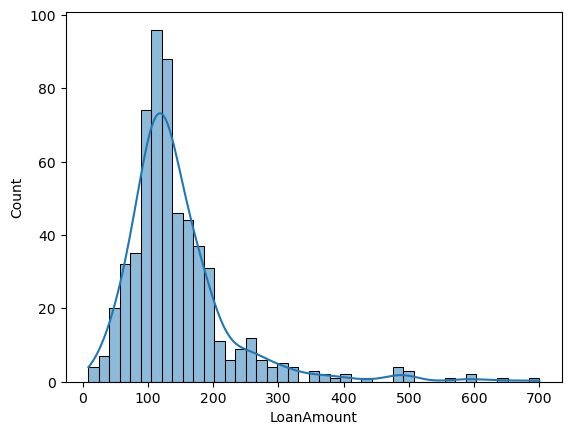

In [9]:
sns.histplot(kde=True, data=df['LoanAmount'])

From the boxplot, we can see the LoanAmount is right skewed.

<Axes: xlabel='LoanAmount_log', ylabel='Count'>

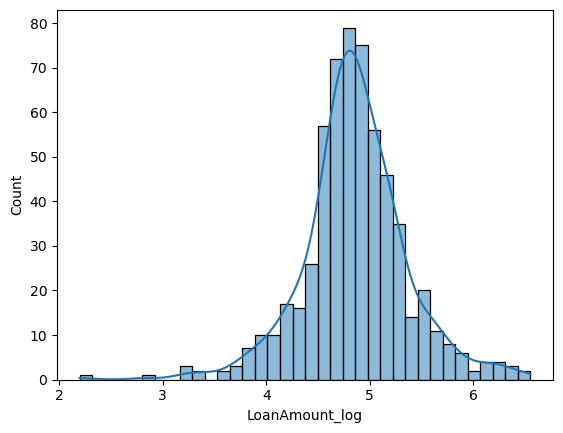

In [10]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
sns.histplot(kde=True, data=df['LoanAmount_log'])

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\Deadpool\AppData\Local\Temp\ipykernel_1308\690353501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\Deadpool\AppData\Local\Temp\ipykernel_1308\690353501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [13]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean)
df.LoanAmount_log = df.LoanAmount.fillna(df.LoanAmount_log.mean)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [15]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'])

In [16]:
x = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values

In [17]:
x

array([['Male', 'No', '0', ..., 1.0,
        <bound method Series.mean of 0        NaN
        1      128.0
        2       66.0
        3      120.0
        4      141.0
               ...
        609     71.0
        610     40.0
        611    253.0
        612    187.0
        613    133.0
        Name: LoanAmount, Length: 614, dtype: float64>, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 128.0, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 66.0, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 253.0, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 187.0, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 133.0, 4583.0]], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [21]:
for i in range(0, 5):
    X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])
    X_train[:, 7] = labelencoder_X.fit_transform(X_train[:, 7])
X_train

array([[1, 1, 0, ..., 1.0, 131.0, 267],
       [1, 0, 1, ..., 1.0, 196.0, 407],
       [1, 1, 0, ..., 0.0, 149.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 200.0, 363],
       [1, 1, 0, ..., 1.0, 160.0, 273],
       [0, 1, 0, ..., 1.0, 182.0, 301]], dtype=object)

In [22]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [23]:
for i in range(0, 5):
    X_test[:, i] = labelencoder_X.fit_transform(X_test[:, i])
    X_test[:, 7] = labelencoder_X.fit_transform(X_test[:, 7])
X_test

array([[1, 0, 0, 0, 5, 1.0, 84.0, 85],
       [0, 0, 0, 0, 5, 1.0, 112.0, 28],
       [1, 1, 0, 0, 5, 1.0, 324.0, 104],
       [1, 1, 0, 0, 5, 1.0, 110.0, 80],
       [1, 1, 2, 0, 5, 1.0, 97.0, 22],
       [1, 1, 0, 1, 3, 0.0, 165.0, 70],
       [1, 1, 3, 0, 3, 1.0, 157.0, 77],
       [1, 0, 0, 0, 5, 1.0, 405.0, 114],
       [1, 0, 0, 0, 5, 0.0, 124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 128.0, 55],
       [0, 0, 0, 0, 5, 1.0, 84.0, 4],
       [1, 1, 1, 0, 5, 1.0, 95.0, 2],
       [0, 0, 0, 0, 5, 1.0, 280.0, 96],
       [1, 1, 2, 0, 5, 1.0, 236.0, 97],
       [1, 1, 0, 0, 5, 1.0, 96.0, 117],
       [1, 1, 1, 0, 5, 1.0, 67.0, 22],
       [1, 0, 1, 1, 5, 1.0, 190.0, 32],
       [1, 0, 0, 1, 5, 1.0, 132.0, 25],
       [0, 0, 0, 0, 5, 1.0, 93.0, 1],
       [1, 1, 0, 1, 5, 0.0, 181.0, 44],
       [0, 1, 0, 0, 5, 0.0, 120.0, 71],
       [1, 1, 0, 0, 5, 1.0, 143.0, 43],
       [1, 1, 2, 0, 5, 1.0, 108.0, 91],
       [1, 1, 2, 0, 5, 1.0, 165.0, 111],
       [1, 1, 0, 0, 5, 1.0, 58.0, 35],
       

In [24]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [31]:
# Check for non-numeric values in X_train
print("Non-numeric in X_train:", [type(item) for row in X_train for item in row if not isinstance(item, (int, float, np.number))])

# Check for non-numeric values in X_test
print("Non-numeric in X_test:", [type(item) for row in X_test for item in row if not isinstance(item, (int, float, np.number))])

Non-numeric in X_train: [<class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>, <class 'method'>]
Non-numeric in X_test: [<class 'method'>, <class 'method'>]


In [32]:
# Convert non-numeric values to NaN, then replace NaN with a placeholder (e.g., 0)
X_train = np.array([[float(item) if isinstance(item, (int, float, np.number)) else np.nan for item in row] for row in X_train])
X_train = np.nan_to_num(X_train)

X_test = np.array([[float(item) if isinstance(item, (int, float, np.number)) else np.nan for item in row] for row in X_test])
X_test = np.nan_to_num(X_test)

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [49]:
from sklearn import metrics

print("The accurecy of decision tree is: ", metrics.accuracy_score(y_pred, y_test))

The accurecy of decision tree is:  0.6585365853658537


### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred = NBClassifier.predict(X_test)

print("The accurecy of naive bayes is: ", metrics.accuracy_score(y_pred, y_test))

The accurecy of naive bayes is:  0.8292682926829268


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = rf_clf.predict(X_test)

print("The accurecy of random forest is: ", metrics.accuracy_score(y_pred, y_test))

The accurecy of random forest is:  0.7723577235772358
